# 0. Dependency

In [1]:
import sys

sys.path.append('..')
sys.path

['/Users/minsoo/.pyenv/versions/3.6.5/lib/python36.zip',
 '/Users/minsoo/.pyenv/versions/3.6.5/lib/python3.6',
 '/Users/minsoo/.pyenv/versions/3.6.5/lib/python3.6/lib-dynload',
 '',
 '/Users/minsoo/Workspaces/python_ws/venvs/ie590_one_shot/lib/python3.6/site-packages',
 '/Users/minsoo/Workspaces/python_ws/venvs/ie590_one_shot/lib/python3.6/site-packages/IPython/extensions',
 '/Users/minsoo/.ipython',
 '..']

In [2]:
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from skimage.transform import resize
import math

/Users/minsoo/Workspaces/python_ws/venvs/ie590_one_shot/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/minsoo/Workspaces/python_ws/venvs/ie590_one_shot/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
tf.__version__

'1.15.0'

# 1.

In [28]:
BASE_PATH = ''

img_file = 'M_10664.avi'
img_file2 = 'K_00001.avi'

print(img_file)
os.path.exists(img_file2)

M_10664.avi


True

In [26]:
cap = cv2.VideoCapture(img_file)
cap2 = cv2.VideoCapture(img_file2)
frameRate = cap.get(5)

In [27]:
frameId = cap2.get(5)
print(frameId)

ret, frame = cap2.read()

cap.isOpened()

8.42


True

(240, 320, 3)


(array([[235, 235, 235, ..., 232, 232, 232],
        [235, 235, 235, ..., 232, 232, 232],
        [235, 235, 235, ..., 232, 232, 232],
        ...,
        [134, 142, 142, ..., 238, 238, 238],
        [127, 143, 146, ..., 238, 238, 238],
        [137, 150, 146, ..., 238, 238, 238]], dtype=uint8),
 array([[238, 238, 238, ..., 235, 235, 235],
        [238, 238, 238, ..., 235, 235, 235],
        [238, 238, 238, ..., 235, 235, 235],
        ...,
        [137, 145, 145, ..., 241, 241, 241],
        [130, 146, 149, ..., 241, 241, 241],
        [140, 153, 149, ..., 241, 241, 241]], dtype=uint8))

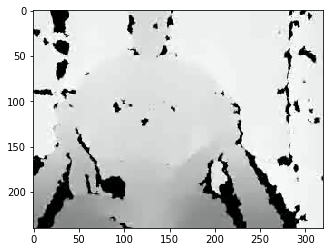

In [35]:
print(frame.shape)
plt.imshow(frame)

frame[:,:,0] == frame[:,:,1]
frame[:,:,0], frame[:,:,1]

In [34]:
cap = cv2.VideoCapture(img_file)
frameRate = cap.get(5) # frame per second

count = 0
while cap.isOpened():
    frameId = cap.get(1) # get current frame ID
    ret, frame = cap.read() # read the next one frame
    
    if ret != True:
        break
    
    if frameId % math.floor(frameRate) == 0:
        filename = "frame%d.jpg" % count
        count += 1
        cv2.imwrite(filename, frame)
cap.release()
print("Done!")

Done!


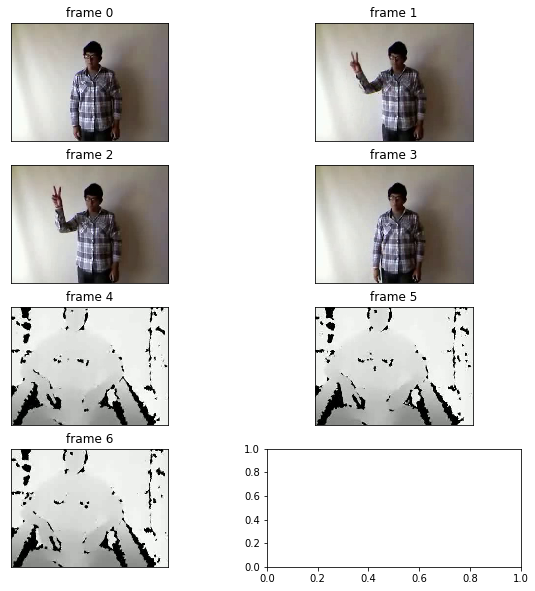

In [35]:
fpath = 'frame0.jpg'

fig, ax = plt.subplots(4, 2, figsize=(10,10))
for i in range(7):
    img = plt.imread('frame%d.jpg'%i)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].set_xticks([])
    ax[i//2, i%2].set_yticks([])
    ax[i//2, i%2].set_title('frame %d' % i)

# input_fn.py testing

In [1]:
import sys

sys.path.append('..')
sys.path

import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from skimage.transform import resize
import math

from ie590_project.model.input_fn import input_fn
from ie590_project.utils.utils import Params

params = Params('params.json')
fnames = ['00001', '10664']

/Users/minsoo/Workspaces/python_ws/venvs/ie590_one_shot/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/minsoo/Workspaces/python_ws/venvs/ie590_one_shot/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
inputs = input_fn(True, fnames, [0,1], params)

x = inputs['images']
y = inputs['targets']
iter_init_op = inputs['iter_init_op']

with tf.Session() as sess:
    sess.run(iter_init_op)
    
    x_sample, y_sample = sess.run([x, y])
    print(x_sample, y_sample)

[[[[[237 194 177 235 238 236]
    [214 171 154 235 238 236]
    [189 146 129 235 238 236]
    ...
    [ 62  95 111 232 235 233]
    [ 58  86 103 232 235 233]
    [ 50  78  95 232 235 233]]

   [[218 175 158 235 238 236]
    [214 171 154 235 238 236]
    [208 165 148 235 238 236]
    ...
    [ 50  83  99 232 235 233]
    [ 51  79  96 232 235 233]
    [ 51  79  96 232 235 233]]

   [[214 155 142 235 238 236]
    [222 163 150 235 238 236]
    [236 177 164 235 238 236]
    ...
    [ 42  66  83 232 235 233]
    [ 54  68  87 232 235 233]
    [ 61  75  94 232 235 233]]

   ...

   [[134 111 122 134 137 135]
    [134 111 122 142 145 143]
    [133 110 121 142 145 143]
    ...
    [119 105 112 238 241 239]
    [ 83  70  74 238 241 239]
    [ 51  38  42 238 241 239]]

   [[134 109 120 127 130 128]
    [134 109 120 143 146 144]
    [134 109 120 146 149 147]
    ...
    [127 113 120 238 241 239]
    [113  97 102 238 241 239]
    [ 94  78  83 238 241 239]]

   [[133 108 119 137 140 138]
    [133 108

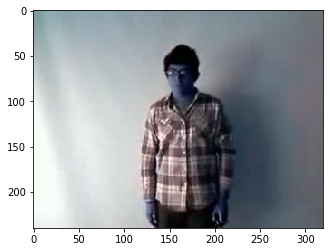

In [16]:
plt.imshow(x_sample[1][4][:,:,:3])